In [1]:
#MOHAMMED SUHAIL
!pip install pandas matplotlib seaborn


In [2]:
#Importing pandas
import pandas as pd

file_path = 'StockMarketIndex.csv'
stock_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
stock_data.head()


,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [4]:
# Display basic information about the dataset
stock_data.info()

# Summary statistics
stock_data.describe()

# Check for missing values
stock_data.isnull().sum()

# Explore unique values in categorical columns (if any)
for column in stock_data.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {stock_data[column].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
Index        104224 non-null object
Date         104224 non-null object
Open         104224 non-null float64
High         104224 non-null float64
Low          104224 non-null float64
Close        104224 non-null float64
Adj Close    104224 non-null float64
Volume       104224 non-null float64
CloseUSD     104224 non-null float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB
Unique values in Index: ['HSI' 'NYA' 'IXIC' '000001.SS' 'N225' 'N100' '399001.SZ' 'GSPTSE' 'NSEI'
 'GDAXI' 'SSMI' 'TWII' 'J203.JO']
Unique values in Date: ['1986-12-31' '1987-01-02' '1987-01-05' ... '1989-01-02' '1995-01-02'
 '2012-01-02']


In [8]:
print(stock_data.columns)


Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'CloseUSD'],
      dtype='object')


In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



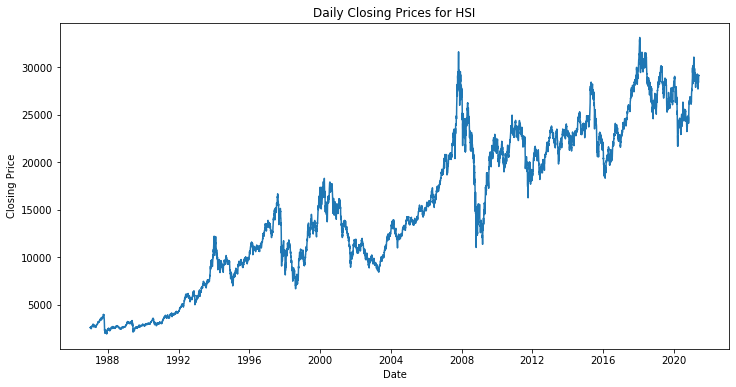

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

# Explicitly register matplotlib converters
register_matplotlib_converters()

# Convert 'Date' to datetime type
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Plotting daily closing prices for 'HSI'
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=stock_data[stock_data['Index'] == 'HSI'])
plt.title('Daily Closing Prices for HSI')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


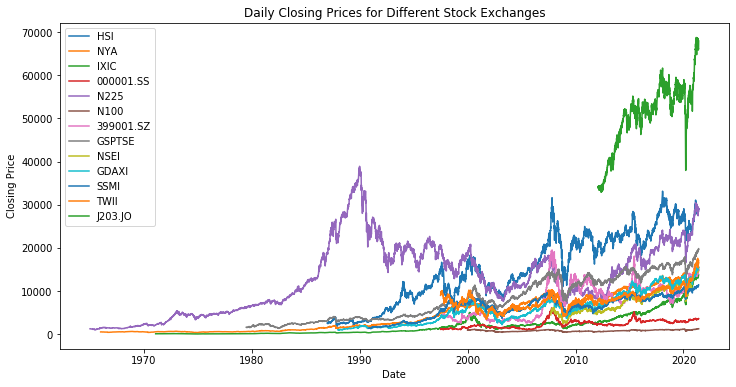

In [12]:
#Line Plot with Multiple Stock Exchanges

plt.figure(figsize=(12, 6))
for index_name in stock_data['Index'].unique():
    sns.lineplot(x='Date', y='Close', data=stock_data[stock_data['Index'] == index_name], label=index_name)
plt.title('Daily Closing Prices for Different Stock Exchanges')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


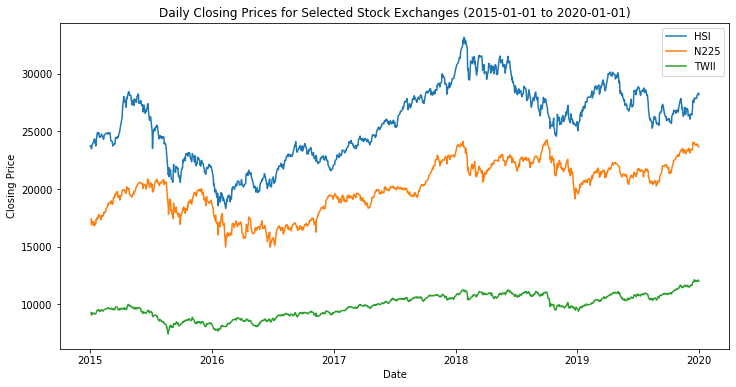

In [38]:
# Reset the index to make 'Date' a regular column
stock_data.reset_index(inplace=True)

# Convert 'Date' to datetime type
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Define the desired date range
start_date = '2015-01-01'
end_date = '2020-01-01'

# Filter data based on the date range
selected_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]

# Plotting daily closing prices for specific stock exchanges within the specified duration
plt.figure(figsize=(12, 6))
selected_exchanges = ['HSI', 'N225', 'TWII']  # Add more exchanges as needed
for index_name in selected_exchanges:
    sns.lineplot(x='Date', y='Close', data=selected_data[selected_data['Index'] == index_name], label=index_name)

plt.title('Daily Closing Prices for Selected Stock Exchanges ({} to {})'.format(start_date, end_date))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



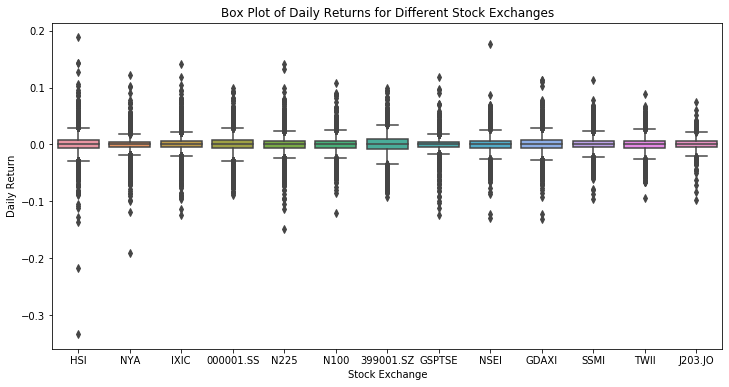

In [18]:
#Comparative Analysis: Box Plot

# Assuming 'Date' is the index
stock_data.set_index('Date', inplace=True)

# Compute daily returns
stock_data['Daily_Return'] = stock_data.groupby('Index')['Close'].pct_change()

# Drop rows with missing values in the 'Daily_Return' column
stock_data.dropna(subset=['Daily_Return'], inplace=True)

# Box plot of daily returns for different stock exchanges
plt.figure(figsize=(12, 6))
sns.boxplot(x='Index', y='Daily_Return', data=stock_data)
plt.title('Box Plot of Daily Returns for Different Stock Exchanges')
plt.xlabel('Stock Exchange')
plt.ylabel('Daily Return')
plt.show()



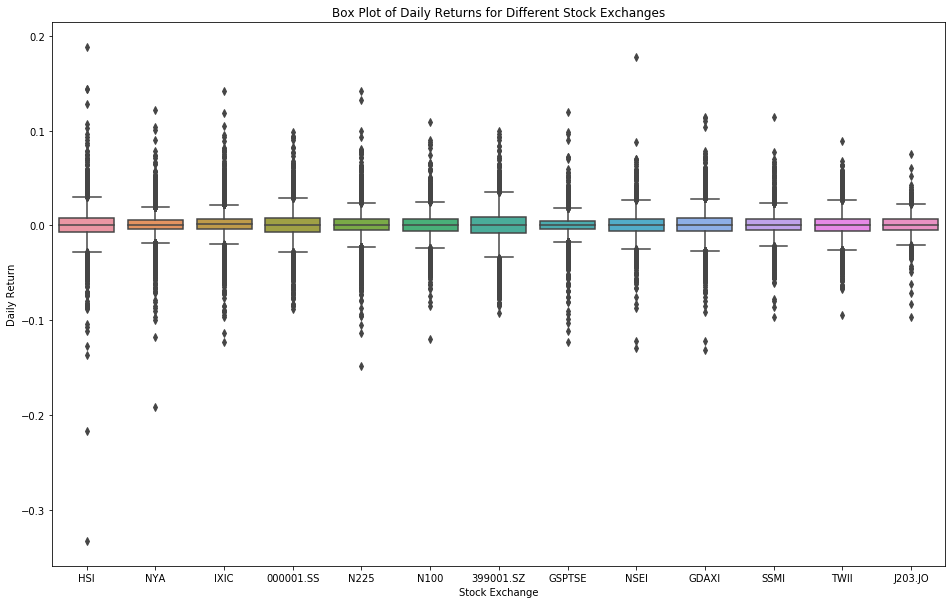

In [46]:
# Box plot of daily returns for different stock exchanges with an increased figure size
plt.figure(figsize=(16, 10))
sns.boxplot(x='Index', y='Daily_Return', data=stock_data)
plt.title('Box Plot of Daily Returns for Different Stock Exchanges')
plt.xlabel('Stock Exchange')
plt.ylabel('Daily Return')
plt.show()


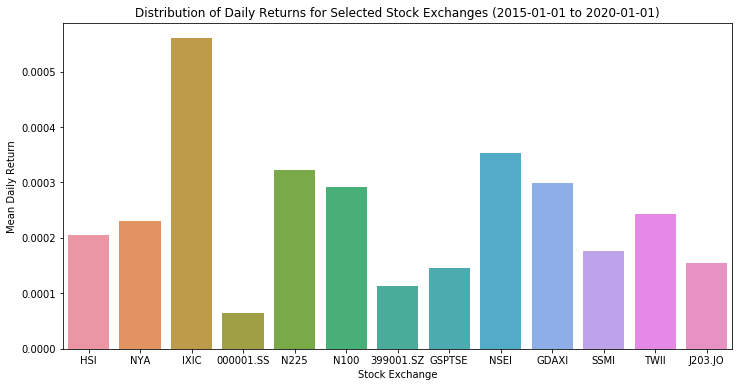

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date' is still the index
stock_data.reset_index(inplace=True)

# Convert 'Date' to datetime type
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Define the desired date range
start_date = '2015-01-01'
end_date = '2020-01-01'

# Filter data based on the date range
selected_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]

# Create a bar chart for the distribution of 'Daily_Return' values
plt.figure(figsize=(12, 6))
sns.barplot(x='Index', y='Daily_Return', data=selected_data, ci=None)
plt.title('Distribution of Daily Returns for Selected Stock Exchanges ({} to {})'.format(start_date, end_date))
plt.xlabel('Stock Exchange')
plt.ylabel('Mean Daily Return')
plt.show()



In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you load the data into stock_data DataFrame
# stock_data = pd.read_csv('your_data_file.csv')

# Print column names to verify the existence of the column containing date information
print(stock_data.columns)

# Check if the column containing date information is in the columns
date_column = 'your_date_column'  # Replace with the actual column name
if date_column in stock_data.columns:
    # Convert the date column to datetime type
    stock_data[date_column] = pd.to_datetime(stock_data[date_column])

    # Define the desired date range
    start_date = '2015-01-01'
    end_date = '2020-01-01'

    # Filter data based on the date range and selected stock indices: GDAXI, NSEI, and SSMI
    selected_indices = ['GDAXI', 'NSEI', 'SSMI']
    selected_data = stock_data[(stock_data[date_column] >= start_date) & (stock_data[date_column] <= end_date) & (stock_data['Index'].isin(selected_indices))]

    # Assuming the date column is set as the index (if it's not set already)
    # selected_data.set_index(date_column, inplace=True)

    # Compute daily returns
    selected_data['Daily_Return'] = selected_data.groupby('Index')['Close'].pct_change()

    # Drop rows with missing values in the 'Daily_Return' column
    selected_data.dropna(subset=['Daily_Return'], inplace=True)

    # Box plot of daily returns for selected stock exchanges within the specified duration
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Index', y='Daily_Return', data=selected_data)
    plt.title('Box Plot of Daily Returns for GDAXI, NSEI, and SSMI ({} to {})'.format(start_date, end_date))
    plt.xlabel('Stock Exchange')
    plt.ylabel('Daily Return')
    plt.show()
else:
    print("The specified date column is not present in the DataFrame.")


Index(['Index', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'CloseUSD', 'Daily_Return'],
      dtype='object')
The specified date column is not present in the DataFrame.


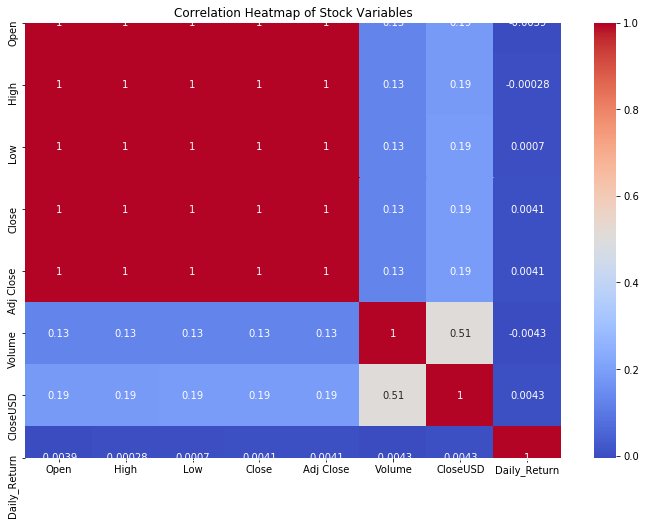

In [22]:
#Correlation Analysis: Heatmap
corr_matrix = stock_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Stock Variables')
plt.show()



In [30]:
#Candlestick Chart:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=hsi_data['Date'],
                open=hsi_data['Open'],
                high=hsi_data['High'],
                low=hsi_data['Low'],
                close=hsi_data['Close'])])

fig.update_layout(title='HSI Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()



In [50]:
import plotly.graph_objects as go

# Define the desired date range
start_date = '2019-01-01'
end_date = '2019-08-01'

# Filter data based on the date range
filtered_hsi_data = hsi_data[(hsi_data['Date'] >= start_date) & (hsi_data['Date'] <= end_date)]

# Create Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=filtered_hsi_data['Date'],
                open=filtered_hsi_data['Open'],
                high=filtered_hsi_data['High'],
                low=filtered_hsi_data['Low'],
                close=filtered_hsi_data['Close'])])

# Update layout
fig.update_layout(title='HSI Candlestick Chart (2019-01-01 to 2019-08-01)',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the chart
fig.show()
